In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import validation_curve,learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor


In [83]:
df=pd.read_csv('C:/Users/alise/Dropbox/Programming/Machine learning in physics- 2021/Project/Success in movies/Machine-learning-in-physics-Project/Phase 1-Data Collection/Data/final data set.csv',index_col=0)

df.drop(['additive Producer(s) rank',
'additive Director(s) rank',
'additive Writer(s) rank',
'additive Stars rank',
'additive Distributor rank','Worldwide Gross ($)','IMDB score','IMDB votes','IMDB ID',
'Mojo ID','Opening ($)','In Realease (Days)',
'Widest Release','Metascore','User',
'Critic','Budget'],axis=1,inplace=True)

df.fillna(df.median(),inplace=True)

df.drop('Year',axis=1,inplace=True)




In [84]:
df.head()

,Opening Theaters,Running time (min),genre Action,genre Adventure,genre Fantasy,genre Sci-Fi,genre Animation,genre Comedy,genre Family,genre Drama,...,country Zambia,country Swaziland,country Republic of North Macedonia,country Reunion,Producer(s) rank,Director(s) rank,Writer(s) rank,Stars rank,Distributor rank,Domestic Gross ($)
0,3452.0,162.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,749766139.0
1,4028.0,103.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,415004880.0
2,3728.0,108.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,334191110.0
3,4380.0,124.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,312433331.0
4,4468.0,124.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300531751.0


In [85]:
X=df.drop('Domestic Gross ($)',axis=1).to_numpy()
Y=df['Domestic Gross ($)'].to_numpy()
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X,Y=shuffle(X,Y)
Y=np.log10(Y)


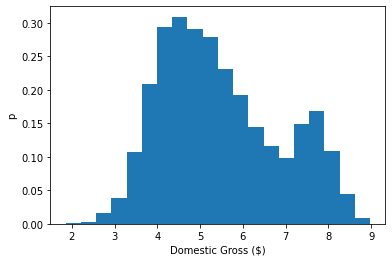

In [86]:
plt.hist(Y,bins=20,density=True)
plt.xlabel('Domestic Gross ($)')
plt.ylabel('p')
plt.show()

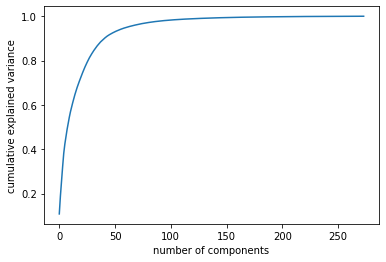

In [18]:
pca=PCA()
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [71]:
for index,item in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    if item>0.999:
        index=index
        break

In [72]:
pca_f=PCA(index)
X_pca = pca_f.fit_transform(X)
X_pca.shape

(7096, 225)

In [88]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [89]:
reg=LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

-1.8250894132294602e+18

In [90]:
from tensorflow import keras as ks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [137]:
model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu',kernel_regularizer=ks.regularizers.l2(0.05)))
model.add(Dense(5, activation='tanh',kernel_regularizer=ks.regularizers.l2(0.05)))
model.add(Dense(1, activation='linear',kernel_regularizer=ks.regularizers.l2(0.05)))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 8)                 2200      
_________________________________________________________________
dense_34 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 6         
Total params: 2,251
Trainable params: 2,251
Non-trainable params: 0
_________________________________________________________________


In [138]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [139]:
%%time
history = model.fit(x_train, y_train, epochs=700, batch_size=100,  verbose=1, validation_split=0.2)

Epoch 1/700
43/43 [==============================] - 1s 7ms/step - loss: 32.4816 - mse: 31.7665 - val_loss: 22.7591 - val_mse: 22.1169
Epoch 2/700
43/43 [==============================] - 0s 1ms/step - loss: 20.2033 - mse: 19.5551 - val_loss: 12.3354 - val_mse: 11.6440
Epoch 3/700
43/43 [==============================] - 0s 1ms/step - loss: 10.6494 - mse: 9.9354 - val_loss: 6.7000 - val_mse: 5.9151
Epoch 4/700
43/43 [==============================] - 0s 2ms/step - loss: 6.1092 - mse: 5.3052 - val_loss: 4.5328 - val_mse: 3.6847
Epoch 5/700
43/43 [==============================] - 0s 1ms/step - loss: 4.4044 - mse: 3.5480 - val_loss: 3.6671 - val_mse: 2.7931
Epoch 6/700
43/43 [==============================] - 0s 1ms/step - loss: 3.5186 - mse: 2.6423 - val_loss: 3.2339 - val_mse: 2.3534
Epoch 7/700
43/43 [==============================] - 0s 1ms/step - loss: 3.1846 - mse: 2.3048 - val_loss: 2.9845 - val_mse: 2.1084
Epoch 8/700
43/43 [==============================] - 0s 1ms/step - loss: 2

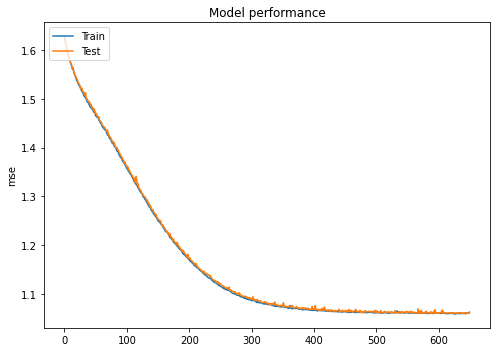

In [140]:
# Plot training & validation accuracy values
ns=50
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1, title = 'Model performance', ylabel= 'mse')
plt.plot(history.history['loss'][ns:])
plt.plot(history.history['val_loss'][ns:])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [141]:
from sklearn.metrics import r2_score
print(f'r2 score on train:{r2_score(y_train,model.predict(x_train))}')
print(f'r2 score on train:{r2_score(y_test,model.predict(x_test))}')

r2 score on train:0.6458357082878567
r2 score on train:0.6424915811228737


In [62]:
coeff_determination(y_test,model.predict(x_test))

AttributeError: module 'tensorflow.keras' has no attribute 'sum'

## preparing data 

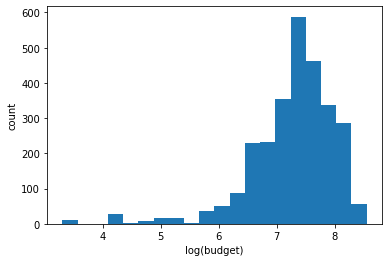

In [456]:

df.drop('Year',axis=1,inplace=True)
X=df[['IMDB score','Opening ($)','IMDB votes','In Realease (Days)','Stars rank']]
Y=df['Budget']

X=X.loc[df['Budget'].dropna().index]
X.fillna(X.mean(),inplace=True)
Y = df['Budget'].dropna().to_numpy()
Y = np.log10(Y)

scaler=MinMaxScaler()
X = scaler.fit_transform(X)
X , Y = shuffle(X,Y)

plt.hist(Y,bins=20)
plt.xlabel('log(budget)')
plt.ylabel('count')
plt.show()


In [457]:
X.shape

(2798, 5)

In [458]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)


In [459]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [463]:
reg.score(x_test,y_test)

0.1510635210974408

In [448]:
df.loc[df['Stars rank'].index[df['Stars rank'].apply(np.isnan)]]

,IMDB ID,Mojo ID,Opening ($),Budget,Opening Theaters,In Realease (Days),Widest Release,Running time (min),IMDB score,IMDB votes,...,Writer(s) rank,Stars rank,Distributor rank,additive Producer(s) rank,additive Director(s) rank,additive Writer(s) rank,additive Stars rank,additive Distributor rank,Domestic Gross ($),Worldwide Gross ($)


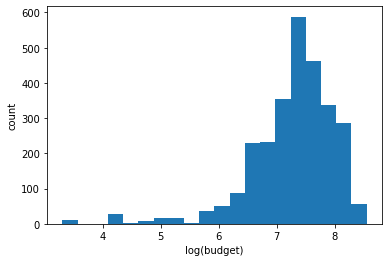

In [368]:
df=pd.read_csv('C:/Users/alise/Dropbox/Programming/Machine learning in physics- 2021/Project/Success in movies/Machine-learning-in-physics-Project/Phase 1-Data Collection/Data/final data set.csv',index_col=0)
df.drop(['additive Producer(s) rank',
'additive Director(s) rank',
'additive Writer(s) rank',
'additive Stars rank','IMDB ID',
'additive Distributor rank','IMDB score','IMDB votes',
'Mojo ID','Opening ($)','In Realease (Days)',
'Widest Release','Metascore','User',
'Critic'],axis=1,inplace=True)



df.drop('Year',axis=1,inplace=True)


#X=df.drop(['Domestic Gross ($)','Worldwide Gross ($)' , 'Budget'],axis=1)

X=X.loc[df['Budget'].dropna().index]
X.fillna(X.mean(),inplace=True)
Y = df['Budget'].dropna().to_numpy()
Y = np.log10(Y)

#index = df['Budget'].index[df['Budget'].apply(np.isnan)]
#x_test = df.loc[index].drop(['Domestic Gross ($)','Worldwide Gross ($)' , 'Budget'],axis=1)

scaler=MinMaxScaler()
X = scaler.fit_transform(X)
X , Y = shuffle(X,Y)

plt.hist(Y,bins=20)
plt.xlabel('log(budget)')
plt.ylabel('count')
plt.show()


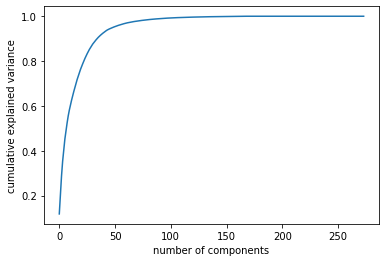

In [369]:
pca=PCA()
pca.fit(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [370]:
for index,item in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    if item>0.99:
        index=index
        break

In [371]:
pca_f=PCA(index)
X_pca = pca_f.fit_transform(X)

In [373]:
X_pca.shape

(2798, 93)

In [374]:
x_train,x_test,y_train,y_test=train_test_split(X_pca,Y)

In [375]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [376]:
reg.score(x_test,y_test)

0.24797459216427076

In [379]:
poly = PolynomialFeatures(degree=2)
poly_train = poly.fit_transform(x_train)
poly_test = poly.fit_transform(x_test)

In [383]:
reg=SGDRegressor()
reg.fit(poly_train,y_train)

SGDRegressor()

In [386]:
reg.score(poly_train,y_train)

0.39651667161895987

In [412]:
reg=RandomForestRegressor(max_depth=15,n_estimators=100)
reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=15)

In [414]:
reg.score(x_train,y_train)

0.8412467561031577

In [409]:
x_train.shape

(2098, 93)

In [ ]:
df[]

In [249]:
df=pd.read_csv('C:/Users/alise/Dropbox/Programming/Machine learning in physics- 2021/Project/Success in movies/Machine-learning-in-physics-Project/Phase 1-Data Collection/Data/final data set.csv',index_col=0)
df.drop(['additive Producer(s) rank',
'additive Director(s) rank',
'additive Writer(s) rank',
'additive Stars rank','IMDB ID',
'additive Distributor rank','IMDB score','IMDB votes',
'Mojo ID','Opening ($)','In Realease (Days)',
'Widest Release','Metascore','User',
'Critic'],axis=1,inplace=True)

#df.fillna(df.mean(),inplace=True)

df.drop('Year',axis=1,inplace=True)


X=df.drop('Domestic Gross ($)',axis=1).to_numpy()
Y=df['Domestic Gross ($)'].to_numpy()
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X,Y=shuffle(X,Y)


In [250]:
df.head()

,Budget,Opening Theaters,Running time (min),genre Action,genre Adventure,genre Fantasy,genre Sci-Fi,genre Animation,genre Comedy,genre Family,...,country Swaziland,country Republic of North Macedonia,country Reunion,Producer(s) rank,Director(s) rank,Writer(s) rank,Stars rank,Distributor rank,Domestic Gross ($),Worldwide Gross ($)
0,237000000.0,3452.0,162.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,749766139.0,2.744337e+09
1,200000000.0,4028.0,103.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,415004880.0,1.066970e+09
2,200000000.0,3728.0,108.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,334191110.0,1.025467e+09
3,200000000.0,4380.0,124.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,312433331.0,6.239333e+08
4,68000000.0,4468.0,124.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300531751.0,6.984913e+08


In [239]:
for item in df.columns:
    print(item)

Budget
Opening Theaters
Running time (min)
genre Action
genre Adventure
genre Fantasy
genre Sci-Fi
genre Animation
genre Comedy
genre Family
genre Drama
genre Romance
genre Thriller
genre Mystery
genre Crime
genre Sport
genre Musical
genre Documentary
genre History
genre Music
genre Biography
genre Horror
genre War
genre Western
genre Short
genre News
genre Film-Noir
genre Reality-TV
genre Adult
MPAA PG-13
MPAA PG
MPAA R
MPAA G
MPAA Unrated
MPAA NC-17
MPAA Not Rated
MPAA M/PG
MPAA TV-PG
Day
Month
language English
language French
language Swedish
language Spanish
language Italian
language Hindi
language Hebrew
language German
language Arabic
language Korean
language None
language Mandarin
language Finnish
language Japanese
language Danish
language Vietnamese
language Portuguese
language Persian
language Greek
language Cantonese
language Serbian
language Norwegian
language Romanian
language Zulu
language Turkish
language Estonian
language Dutch
language Russian
language Catalan
language 

In [251]:
dic_classification={}

In [252]:
dic_classification['super hit']=df.loc[(df['Budget']>50e6) & (df['Budget']*4<=df['Worldwide Gross ($)'])].index

dic_classification['blockbuster']=df.loc[(df['Budget']>50e6) & (df['Budget']*4>df['Worldwide Gross ($)']) & (df['Budget']*2.5<=df['Worldwide Gross ($)'])].index

dic_classification['minor success']=df.loc[(df['Budget']>50e6) & (df['Budget']*2.5>df['Worldwide Gross ($)']) & (df['Budget']*1.5<=df['Worldwide Gross ($)'])].index

dic_classification['flop']=df.loc[(df['Budget']>50e6) & (df['Budget']*1.5>df['Worldwide Gross ($)']) & (df['Budget']<=df['Worldwide Gross ($)'])].index

dic_classification['box office bomb'] = df.loc[(df['Budget']>50e6) & (df['Budget']>df['Worldwide Gross ($)'])].index

dic_classification['hit'] = df.loc[(df['Budget']<=50e6) & (df['Budget']>1e6) & (df['Budget']*2<=df['Worldwide Gross ($)'])].index

dic_classification['minor success_2'] = df.loc[(df['Budget']<=50e6) & (df['Budget']>1e6) & (df['Budget']*2>df['Worldwide Gross ($)']) & (df['Budget']*1.3<=df['Worldwide Gross ($)'])].index

dic_classification['great success'] = df.loc[(df['Budget']<=1e6)  & (df['Budget']*2<=df['Worldwide Gross ($)'])].index

dic_classification['big success'] = df.loc[(df['Budget']<=1e6)  & (df['Budget']*2>df['Worldwide Gross ($)']) & (df['Budget']<=df['Worldwide Gross ($)'])].index

dic_classification['success'] = df.loc[(df['Budget']<=1e6)  &  (df['Budget']>df['Worldwide Gross ($)'])].index


In [253]:
len(dic_classification['minor success'])

118

In [254]:
sum((df['Budget']>=1e6) & (df['Budget']<=50e6))

1939

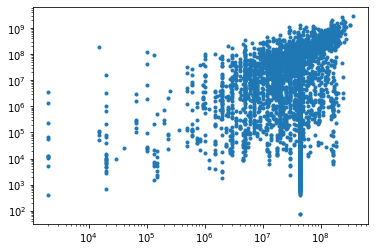

In [282]:
plt.plot(df['Budget'].fillna(df['Budget'].mean()),df['Worldwide Gross ($)'].fillna(df['Worldwide Gross ($)'].mean()),'.')
plt.xscale('log')
plt.yscale('log')
plt.show()

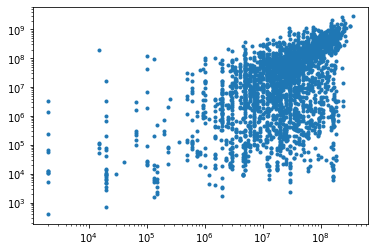

In [283]:
plt.plot(df['Budget'],df['Worldwide Gross ($)'],'.')
plt.xscale('log')
plt.yscale('log')
plt.show()

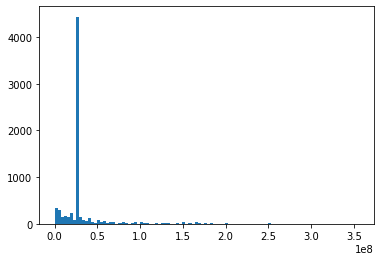

In [278]:
plt.hist(df['Budget'].fillna(df['Budget'].median()),bins=100)
plt.show()

In [270]:
len(df['Worldwide Gross ($)'].dropna())

7094

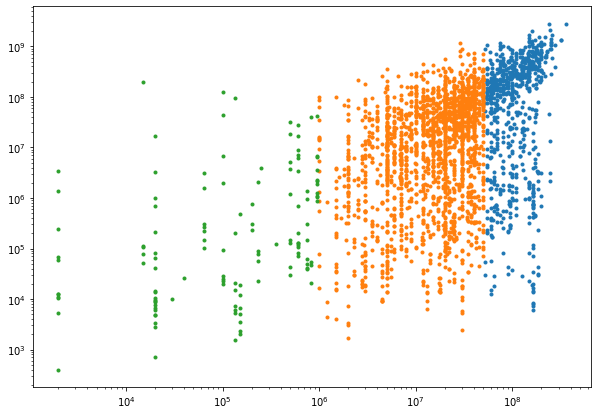

In [255]:
plt.figure(figsize=(10,7))
x=df['Budget']
y=df['Worldwide Gross ($)']
plt.plot(x[x>50e6],y[x>50e6],'.')
plt.plot(x[(x<=50e6) & (x>=1e6)],y[(x<=50e6) & (x>=1e6)],'.')
plt.plot(x[(x<1e6)],y[(x<1e6)],'.')
plt.xscale('log')
plt.yscale('log')

In [222]:
sum(x<1e6)+sum((x>=1e6) & (x<50e6))+sum(x>=50e6)

2798

In [226]:
sum(x<1e6)+sum(x>=1e6)

2798

In [227]:
sum(x>=1e6)

2670

In [223]:
sum(x<1e6)

128

In [224]:
sum((x>=1e6) & (x<50e6))

1873

In [225]:
sum(x>=50e6)

797

In [79]:
sum(df['Budget']>50e6)

731

In [80]:
sum(df['Budget']<50e6)


6299

In [21]:
x,y=np.unique(Y,return_counts=True)

In [64]:
minn=min(x)
maxx=max(x)
group = 5
const = (maxx/minn)**(1/group)
bining=[(const**i)*minn for i in range(group+1) ]
hist=np.zeros(len(bining)-1)
counter=0
for index,item in enumerate(x):
    while counter<len(bining)-1:
        if item>=bining[counter] and item<bining[counter+1]:
            hist[counter]+=y[index]
            break 
        counter+=1
mean=np.array([(bining[i]+bining[i+1])/2 for i in range(len(bining)-1)])

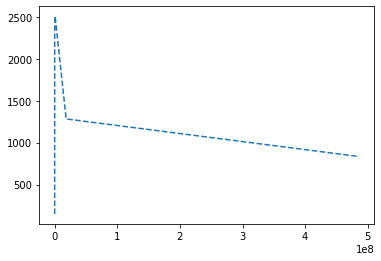

In [67]:
plt.plot(mean,hist,'--')

(array([ 149., 2321., 2509., 1283.,  834.]),
 array([7.20000000e+01, 1.90626203e+03, 5.04699297e+04, 1.33623487e+06,
        3.53779696e+07, 9.36662225e+08]),
 <BarContainer object of 5 artists>)

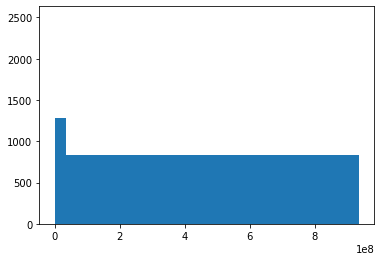

In [72]:
plt.hist(Y,bins=bining)
#plt.show()

In [73]:
bining[-1]

936662225.0000012

In [74]:
Y[-1]

4535154.0